# Введение в ООП

Доп. материалы:

[YouTube ArjanCodes](https://www.youtube.com/c/arjancodes)

ООП - это методология программирования, в рамках которой все компоненты  программы рассматриваются как объекты, взаимодействующие друг с другом. У каждого объекта есть свойства и поведение. Объекты являются экземплярами классов, а классы образуют иерархию наследования.

ООП позволяет логически связать данные (свойства) и обработку этих данных (поведение).

## Классы и объекты

Рассмотрим пример, чтобы ознакомиться с синтаксисом.

In [ ]:
class MyClass:  # Создание класса
    static_var = "Static Variable"  # Переменная класса (будет у всех созданных объектов одинаковой)

    def __init__(self, name):  # Конструктор - задает параметры конкретного объекта при инициализации
        self.instance_var = "Instance Variable"  # Переменная объекта
        self.name = name  # self - это обращение объекта к самому себе

    def __repr__(self):  # Строковое представление объекта. Должно быть однозначным
        return f"MyClass('{self.name}')"

    def __str__(self):  # Тоже строковое представление объекта. Должно быть человеко-читаемым
        return f"MyClass object: name={self.name}"

    @classmethod  # Метод, работающий с самим классом и переменными класса
    def class_method(cls):
        print("This is a class method.")
        print("Accessing static variable:", cls.static_var)

    def instance_method(self):  # Метод, работающий с объектом и его переменными
        print("This is an instance method.")
        print("Accessing instance variable:", self.instance_var)

    @staticmethod  # Метод, который не использует в работе ни класс, ни объект. Можно вынести вовне как обычную функцию
    def static_method():
        print("This is a static method.")

In [ ]:
obj = MyClass("Whatever")  # Создание экземпляра класса (объекта)
obj2 = MyClass("Whatever2")

# Атрибуты
print(obj.name)
print(obj.instance_var)
print(MyClass.static_var)

# Методы
print()
obj.instance_method()
MyClass.class_method()
MyClass.static_method()

# __str__ и __repr__
print()
print(obj)
print(repr(obj))
print()
print(obj2)
print(repr(obj2))

Whatever
Instance Variable
Static Variable

This is an instance method.
Accessing instance variable: Instance Variable
This is a class method.
Accessing static variable: Static Variable
This is a static method.

MyClass object: name=Whatever
MyClass('Whatever')

MyClass object: name=Whatever2
MyClass('Whatever2')


Python предоставляет специальные методы (магические методы или dunder-методы), которые позволяют классам определять свое поведение в определенных ситуациях. Эти методы вызываются неявно и обеспечивают функциональность для общих операций. Некоторые часто используемые магические методы - `__init__`, `__str__` и методы перегрузки операторов.

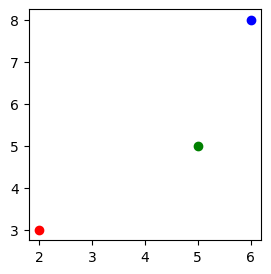

In [ ]:
import matplotlib.pyplot as plt


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):  # Перегрузка оператора
        return Point(self.x + other.x, self.y + other.y)


point1 = Point(2, 3)
point2 = Point(4, 5)
point3 = point1 + point2  # Использование перегруженного оператора

fig = plt.figure(figsize=(3, 3))
plt.scatter(point1.x, point1.y, color='red')
plt.scatter(point2.y, point2.y, color='green')
plt.scatter(point3.x, point3.y, color='blue')
plt.show()

Про нейминг:

* Имена классов должны записываться с помощью CamelCase.
* В именах переменных и методов следует использовать строчные буквы и символы подчеркивания (snake_case).
* Константы должны быть записаны верхним регистром.

### Модификаторы доступа

В Python модификаторы доступа реализованы на уровне соглашения по принципу "мы знаем, что если нажать эту кнопку, то всё сломается, поэтому не будем её нажимать".

Public (открытый доступ): публичные атрибуты и методы могут быть свободно доступны из любой части программы.

In [ ]:
class Person:
    def __init__(self, name):
        self.name = name  # public

    def display_name(self):  # public
        print(f"Name: {self.name}")


person = Person("Kira")
person.display_name()

Name: Kira


Protected (защищенный доступ): защищенные атрибуты и методы должны быть использованы только внутри класса и его подклассов.

In [ ]:
class BankAccount:
    def __init__(self, account_number):
        self._account_number = account_number  # protected

    def _validate_account(self):  # protected
        print("Account number validated.")

    def display_account_number(self):
        self._validate_account()  # protected
        print(f"Account number: {self._account_number}")


account = BankAccount("1234567890")
account.display_account_number()
account._validate_account()  # Вот поэтому к OOP на Python относятся очень скептически

Account number validated.
Account number: 1234567890
Account number validated.


Private (закрытый доступ): приватные атрибуты и методы должны использоваться только внутри класса, они не доступны за его пределами.

In [ ]:
class Employee:
    def __init__(self, employee_id):
        self.__employee_id = employee_id  # private

    def __calculate_salary(self):  # private
        print("Salary calculated.")

    def get_employee_id(self):
        self.__calculate_salary()
        return self.__employee_id


employee = Employee(12345)
print(employee.get_employee_id())
employee.__employee_id  # Ошибка

Salary calculated.
12345


AttributeError: ignored

Доступ к приватным методам и атрибутам можно получить с помощью механизма рефлексии. Но лучше так не делать.

In [ ]:
attribute_name = "_Employee__employee_id"
employee_id = getattr(employee, attribute_name)
print(employee_id)

12345


### Property

Это встроенный декоратор, который позволяет управлять доступом к атрибутам класса. Он позволяет определить специальные методы для получения (геттер) и  установки (сеттер) значения атрибута. Это предоставляет возможность контролировать, как атрибуты класса используются и изменяются во время выполнения.

Преимущества использования property:
* Контроль доступа: можно установить правила для получения и установки значений атрибута, например, проверять или преобразовывать значения.
* Сокрытие сложной логики: можно скрыть сложную логику за простым интерфейсом доступа к атрибуту.
* Совместимость со старым кодом: можно добавить property в существующий класс без необходимости изменять существующий код, который использует этот атрибут.

In [ ]:
import time


class Timer:
    def __init__(self):
        self.__start_time = None
        self.__elapsed_time = None  # Атрибут

    @property
    def elapsed_time(self):  # Реализация логики get / set
        if self.__start_time is None:
            raise RuntimeError("Timer has not been started.")
        if self.__elapsed_time is None:
            return time.time() - self.__start_time
        else:
            return self.__elapsed_time

    def start(self):
        if self.__start_time is not None:
            raise RuntimeError("Timer has already been started.")
        self.__start_time = time.time()

    def stop(self):
        if self.__start_time is None:
            raise RuntimeError("Timer has not been started.")
        if self.__elapsed_time is None:
            self.__elapsed_time = time.time() - self.__start_time
        self.__start_time = None

In [ ]:
timer = Timer()

timer.start()
time.sleep(2)
print(timer.elapsed_time)  # Обращаемся как к атрибуту

time.sleep(3)
print(timer.elapsed_time)

timer.stop()
print(timer.elapsed_time)

2.000523090362549
5.001055479049683


RuntimeError: ignored

*На русский property переводится как свойство, но обычно его не переводят.*

### dataclasses

Эта стандартная библиотека упрощает создание классов, которые предназначены для хранения и обработки данных путем автоматического создания методов, таких как `__init__`, `__repr__`, `__eq__`, и других. Если у вас в классе больше полей, чем методов, имеет смысл обратиться к dataclasses.

In [ ]:
from dataclasses import dataclass


@dataclass  # Если написать @dataclass(frozen=True), то значения атрибутов нельзя будет изменить после создания экземпляра
class Rectangle:
    width: float
    height: float

    @property
    def area(self) -> float:
        return self.width * self.height

    @property
    def perimeter(self) -> float:
        return 2 * (self.width + self.height)


rectangle = Rectangle(5, 3)
print(rectangle)
print(rectangle.area)
print(rectangle.perimeter)

Rectangle(width=5, height=3)
15
16


## Интерфейсы

Интерфейс в ООП определяет контракт, то есть набор методов и свойств, которые должны быть реализованы классами, имплементируюшими этот интерфейс.

В Python нет встроенной поддержки интерфейсов, но можно использовать абстрактные базовые классы (ABC) из модуля abc, включенного в стандартную библиотеку. Абстрактный класс — это класс, у которого не реализован один или больше методов.

In [ ]:
from abc import ABC, abstractmethod
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, uniform, chi2


class Distribution(ABC):  # Абстрактный класс, использующийся в качестве интерфейса
    @abstractmethod
    def generate_sample(self) -> float:  # Не реализованный метод
        pass

    def generate_samples(self, n: int) -> List[float]:  # Реализация по умолчанию
        return [self.generate_sample() for _ in range(n)]

    def draw_samples(self, n: int, dist_type: str='Normal'):
        samples = self.generate_samples(n)
        plt.hist(samples, bins=30)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'{dist_type} Distribution')
        plt.show()


class NormalDistribution(Distribution):  # Класс, имплементирующий интерфейс
    def __init__(self, mean: float, std_dev: float):
        self.mean = mean
        self.std_dev = std_dev

    def generate_sample(self) -> float:  # Реализация абстрактного метода. Закомментируйте и запустите следующую ячейку - получите ошибку
        return norm.rvs(loc=self.mean, scale=self.std_dev)

    def draw_samples(self, n: int):  # Обращение к родительскому классу
        super().draw_samples(n, 'Normal')


class UniformDistribution(Distribution):
    def __init__(self, low: float, high: float):
        self.__dist_type = 'Uniform'
        self.low = low
        self.high = high

    def generate_sample(self) -> float:
        return uniform.rvs(loc=self.low, scale=self.high - self.low)

    def draw_samples(self, n: int):
        super().draw_samples(n, 'Uniform')


class ChiSquareDistribution(Distribution):
    def __init__(self, df: int):
        self.df = df

    def generate_sample(self) -> float:
        return chi2.rvs(df=self.df)

    def draw_samples(self, n: int):
        super().draw_samples(n, 'Chi2')

-0.06643877975380522


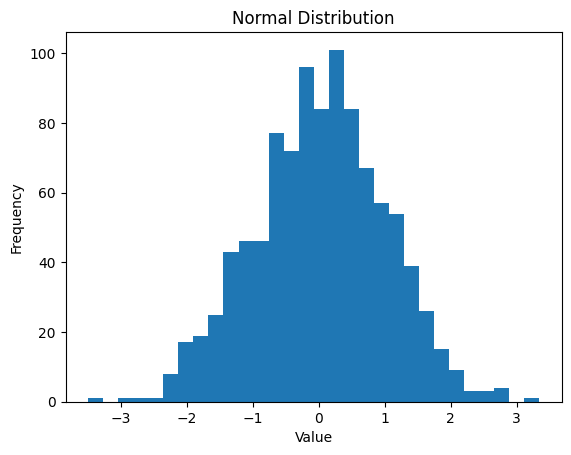

In [ ]:
normal_dist = NormalDistribution(mean=0, std_dev=1)

normal_sample = normal_dist.generate_sample()
print(normal_sample)

normal_dist.draw_samples(1000)

[1.5974595080937215, -1.1922529401016424, -2.683015409741296, -2.4794549147193865, 1.1590799911220788]


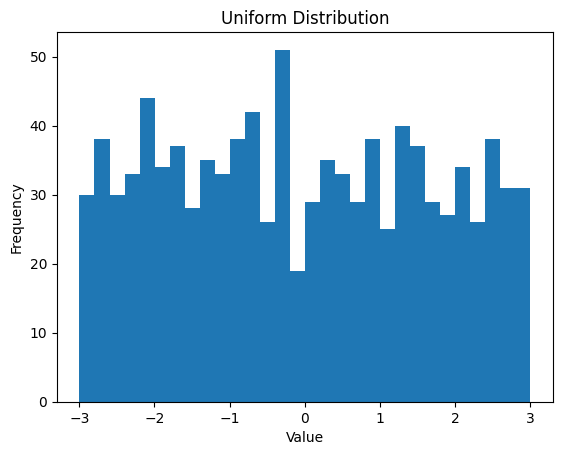

In [ ]:
uniform_dist = UniformDistribution(low=-3, high=3)

uniform_samples = uniform_dist.generate_samples(5)
print(uniform_samples)

uniform_dist.draw_samples(1000)

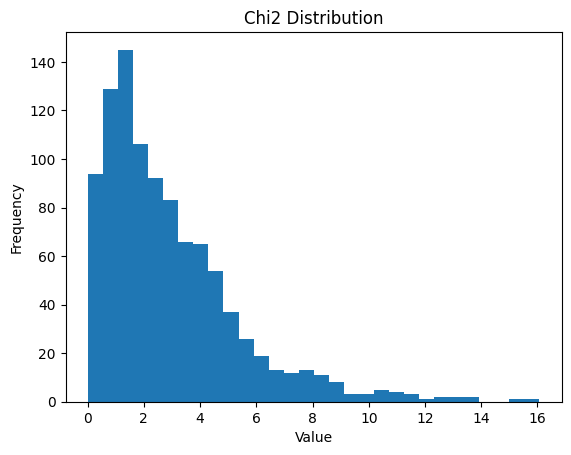

In [ ]:
chi_square_dist = ChiSquareDistribution(df=3)
chi_square_dist.draw_samples(1000)

## Основные принципы ООП

### Абстракция
Это процесс выделения общих характеристик и функциональности объектов и их представление в программе. Она позволяет скрыть детали реализации и сосредоточиться на важных аспектах объектов.

Если кратко, то не нужно добавлять в код ненужное, а нужное стоит выносить в интерфейсы.

In [ ]:
from abc import ABC, abstractmethod


class Shape(ABC):  # Абстракция
    @abstractmethod
    def area(self):
        pass


class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius**2


class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

In [ ]:
circle = Circle(5)
print(circle.area())

rectangle = Rectangle(4, 6)
print(rectangle.area())

78.5
24


В классе фигур мы реализуем только метод для вычисления площади, потому что именно в нем мы заинтересованы. Мы не используем всю полноту знаний об объекте (например то, как название фигуры читается на разных языках) для вычисления площади.

### Инкапсуляция
Это механизм объединения данных и методов, работающих с этими данными, внутри класса. Она позволяет ограничить доступ к данным и методам, предоставляя интерфейс для работы с объектом. Инкапсуляция способствует безопасности, скрывая внутренние детали реализации от внешнего мира.

In [ ]:
class User:
    def __init__(self, username, password):
        self.__username = username
        self.__password = password
        self.__logged = False

    @property
    def username(self):
        return self.__username

    @property
    def is_logged_in(self):
        return self.__logged

    def login(self, username, password):
        if self.__username == username and self.__password == password:
            self.__logged = True
            print("Login successful!")
        else:
            print("Invalid username or password.")

    def logout(self):
        self.__logged = False
        print("Logout successful!")

In [ ]:
user = User("Шлёпа", "multipass")

user.login("Шлёпа", "multipass")
print(user.is_logged_in)

user.logout()
print(user.is_logged_in)

user.login("Шлёпа", "wrong_password")

Login successful!
True
Logout successful!
False
Invalid username or password.


Приватные атрибуты `__username`, `__password` и `__logged` инкапсулированы и не могут быть доступны напрямую извне класса. Вместо этого мы предоставляем публичные методы `login()`, `logout()`, `get_username()` и `is_logged_in()`, чтобы контролировать доступ к данным и функциональности пользователя.

### Наследование
Это механизм, который позволяет создавать новые классы на основе существующих классов, наследуя их свойства и методы. Класс, от которого происходит наследование, называется базовым или родительским классом, а класс, который наследует свойства и методы, называется производным или дочерним классом. Наследование позволяет создавать иерархии классов и управлять кодом более эффективно, избегая повторений и улучшая переиспользование кода.

In [ ]:
class Human:  # Базовый класс
    def __init__(self, name):
        self.name = name


class Child(Human):  # Класс-наследник
    def __init__(self, name, favourite_toy=None):  # Расширение метода
        super().__init__(name)  # Таким образом можно обращаться к методам родительского класса
        self.favourite_toy = favourite_toy

    def play(self):  # Новый метод
        print(f"{self.name} is playing :)")


class Adult(Human):
    def work(self):
        print(f"{self.name} is working :(")

In [ ]:
child = Child('Ava', 'teddy bear')
print(child.favourite_toy)
child.play()

adult = Adult('Eve')
adult.work()

teddy bear
Ava is playing :)
Eve is working :(


В Python также присутствует множественное наследование.

*Из-за него могут возникать проблемы, когда в родительских классах присутствуют методы с одинаковыми названиями. Почитайте про "проблему ромба".*

In [ ]:
class Teenager(Child, Adult):
    pass

In [ ]:
teen = Teenager('Aurora')
teen.play()
teen.work()

Aurora is playing :)
Aurora is working :(


Порядок разрешения методов (MRO) определяет порядок поиска методов в иерархии классов:

In [ ]:
Teenager.__mro__

(__main__.Teenager, __main__.Child, __main__.Adult, __main__.Human, object)

### Полиморфизм
Это способность объектов разных классов использовать одинаковые имена методов для выполнения разных действий. Полиморфизм позволяет использовать один интерфейс для работы с разными типами объектов, что упрощает написание более гибкого и расширяемого кода.

In [ ]:
# Одна и та же операция работает по-разному с разными объектами. + эквивалентен методу __add__

print(11 + 10)
print('11' + '10')
print(b'11' + b'10')

21
1110
b'1110'


## Принципы SOLID

Принципы SOLID — это стандарт кодирования, согласно которому все разработчики должны иметь четкую концепцию правильной разработки программного обеспечения. При правильном применении SOLID делает код более расширяемым, логичным и легким для чтения.

### S — single responsibility

Каждый модуль (класс) должен быть ответственен за единственную задачу. Он может иметь несколько методов, но они должны использоваться лишь для решения общей задачи.

Код, нарушающий принцип:

In [ ]:
class Employee:
    def calculate_salary(self):
        # Расчет зарплаты сотрудника
        pass

    def save_to_database(self):
        # Сохранение данных сотрудника в базу данных
        pass

Исправленный код:

In [ ]:
class Employee:
    def calculate_salary(self):
        # Расчет зарплаты сотрудника
        pass


class DatabaseInteraction:
    def save_to_database(self, employee):
        # Сохранение данных сотрудника в базу данных
        pass

Объяснение: в неправильном коде класс `Employee` имеет две ответственности: расчет зарплаты и сохранение данных в базу данных.

Исправленный код разделяет эти ответственности, вводя класс `DatabaseInteraction`, который отвечает за сохранение сотрудников в базу данных. Теперь каждый класс имеет только одну ответственность.

### O — open-closed

Система должна быть открыта для расширения, но закрыта для модификации.
Для расширение предполагается использование полиморфизма, то есть расширение через новую имплементацию интерфейса, либо через расширение интерфейса.

Код, нарушающий принцип:

In [ ]:
class PaymentProcessor:
    def process_payment(self, payment_method, amount):
        if payment_method == 'credit_card':
            # Код для обработки платежа с кредитной карты
            pass
        elif payment_method == 'bank_transfer':
            # Код для обработки банковского перевода
            pass

Исправленный код:

In [ ]:
from abc import ABC, abstractmethod


class PaymentProcessor(ABC):
    @abstractmethod
    def process_payment(self, amount):
        pass


class CreditCardPayment(PaymentProcessor):
    def process_payment(self, amount):
        # Код для обработки платежа с кредитной карты
        pass


class BankTransferPayment(PaymentProcessor):
    def process_payment(self, amount):
        # Код для обработки банковского перевода
        pass

Объяснение: нарушение принципа происходит потому, что если появится новый способ оплаты, например, 'криптовалюта', нам потребуется изменять класс `PaymentProcessor`, добавляя новый блок условий. Это нарушает принцип открытости/закрытости, так как класс не закрыт для модификации.

В исправленном коде мы определяем абстрактный базовый класс `PaymentProcessor`, который предоставляет общий интерфейс для обработки платежей. Каждый конкретный способ оплаты (`CreditCardPayment`, `BankTransferPayment`) наследуется от `PaymentProcessor` и предоставляет свою собственную реализацию метода `process_payment`. Теперь, если мы добавим новый способ оплаты, мы просто можем создать новый класс, наследующийся от `PaymentProcessor` и реализующий необходимое поведение, без изменения существующего кода.

### L — Liskov substitution

Производный класс должен быть взаимозаменяем с базовым классом.
Для этого должны выполняться условия:

1. Предварительные условия не могут быть усилены в подтипе.
2. Постусловия не могут быть ослаблены в подтипе.
3. Инварианты супертипа должны быть сохранены в подтипе (инвариант — это набор условий, при которых объект имеет смысл).

Клиент не должен знать, использует ли он базовый класс или какой-то из его подтипов, поведение должно быть ожидаемым.

Код, нарушающий принцип:

In [ ]:
class Vehicle(ABC):
    pass


class Car(Vehicle):
    def start_engine(self):
        # Код для запуска двигателя автомобиля
        pass


class ElectricCar(Car):
    def start_engine(self):
        raise NotImplementedError("Электромобили не имеют двигателя")

Исправленный код:

In [ ]:
class Vehicle(ABC):
    pass


class Car(Vehicle):
    def start_engine(self):
        # Код для запуска двигателя автомобиля
        pass


class ElectricCar(Vehicle):
    pass

Объяснение: нарушение происходит потому, что класс `ElectricCar` вызывает исключение `NotImplementedError` для метода `start_engine`, указывая, что электромобили не имеют двигателя. Это нарушает принцип подстановки Барбары Лисков, так как нарушается возможность подстановки класса `ElectricCar` вместо его базового класса `Car`.

В исправленном коде класс `ElectricCar` наследуется непосредственно от `Vehicle` и не переопределяет метод `start_engine`, так как у электромобилей нет двигателя для запуска. Это обеспечивает возможность подстановки класса `ElectricCar` вместо его базового класса `Vehicle`.

*Представьте ситуацию, что у вас есть класс `Прямоугольник` с методом расчета площади, и вы унаследовали от него класс `Квадрат`. Подумайте, как нарушается принцип подстановки Лисков в данном случае и что нужно изменить, чтобы исправить ситуацию.*

### I — interface segregation

Много небольших интерфейсов для разных клиентов лучше, чем один большой общий интерфейс.
При нарушении этого принципа клиент, использующий некоторый интерфейс со всеми его методами, зависит от методов, которыми не пользуется, и поэтому оказывается восприимчив к изменениям в этих методах. В итоге мы приходим к жесткой зависимости между различными частями интерфейса, которые могут быть не связаны при его реализации.

Код, нарушающий принцип:

In [ ]:
class Printer(ABC):
    @abstractmethod
    def print(self, document):
        pass

    @abstractmethod
    def fax(self, document):
        pass

    @abstractmethod
    def scan(self, document):
        pass

Исправленный код:

In [ ]:
class Printer(ABC):
    @abstractmethod
    def print(self, document):
        pass


class Fax(ABC):
    @abstractmethod
    def fax(self, document):
        pass


class Scanner(ABC):
    @abstractmethod
    def scan(self, document):
        pass

Объяснение: неправильный код нарушает ISP, включая методы, которые не являются необходимыми для всех клиентов.

Исправленный код разделяет ответственности на три отдельных класса: `Printer`, `Fax` и `Scanner`. Теперь каждый класс имеет только одну ответственность, и клиенты могут использовать только необходимые интерфейсы.

### D — dependency inversion

Зависимости строятся на абстракциях (интерфейсах).
Модули более высоких уровней (бизнес-логики) не должны зависеть от модулей более низкого уровня (ввода/вывода).
Детали должны зависеть от абстракций, а не наоборот.

Код, нарушающий принцип:

In [ ]:
class ReportGenerator:
    def generate_report(self):
        data = self.fetch_data()
        # Генерация отчета с использованием данных
        pass

    def fetch_data(self):
        # Получение данных из определенного источника данных
        pass

Исправленный код:

In [ ]:
class ReportGenerator:
    def __init__(self, data_source):
        self.data_source = data_source

    def generate_report(self):
        data = self.data_source.fetch_data()
        # Генерация отчета с использованием данных
        pass


class DataSource(ABC):
    @abstractmethod
    def fetch_data(self):
        pass


class ConcreteDataSource(DataSource):
    def fetch_data(self):
        # Получение данных из определенного источника данных
        pass

Объяснение: неправильный код нарушает DIP, так как `ReportGenerator` непосредственно зависит от конкретного источника данных.

Исправленный код вводит класс `DataSource`, который может быть внедрен в `ReportGenerator`. Теперь `ReportGenerator` зависит от абстракции (интерфейс `DataSource`) вместо конкретной реализации, что обеспечивает большую гибкость и упрощает тестирование. Можно легко добавлять новые `ConcreteDataSource`-s.